In [74]:
%matplotlib inline

In [75]:
import cv2 

import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from jasons_skeletonize_from_array import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from erosion_dilation_from_array import *

# from generate_waypoints import *

from inverse_skeletonize_from_array import *

from overlay_images import *

from zig_zag_full_image_3 import *

from write_chinese_post_man_from_graph_csv import *

from chinese_post_man_from_graph import *

from find_coverage_metrics_from_array import *



In [76]:
# erosion dilation 
# WARNING : important edge case is when your skeleton has a loop in it, this may mess up all of the algorithms pretty bad 

# path to image
path = r'../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png'
image = open_image(path)
option = 2 # 1 = erode first 2 = dialate first 
num_erosions = 4
num_dilations = 4

e_d_image  = erosion_dilation_from_array(image,option,num_erosions,num_dilations)

cv2.imwrite('e_d_image.png', e_d_image)



found image at :  ../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png


True

In [77]:
# skeletonize 
med_axis , skeleton , skeleton_lee , thinned , thinned_partial = jasons_skeletonize_from_array(e_d_image)

skeletons = [med_axis , skeleton , skeleton_lee , thinned]

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



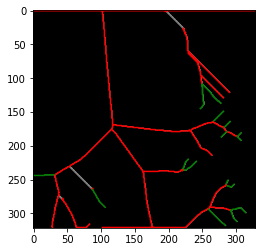

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



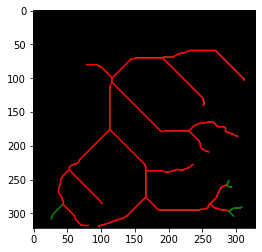

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



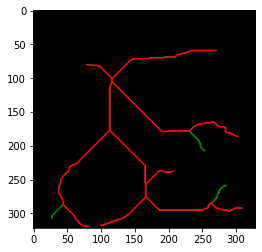

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



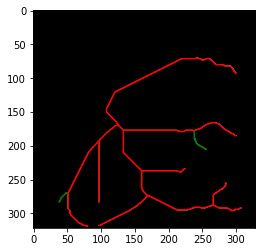

In [78]:
#try and preprocess the skeletons a bit and trim edges
trimmed_skeletons = []
weight_threshold = 42
for skel in skeletons:
    
    
    # option = 2 # 1 = erode first 2 = dialate first 
    # num_erosions = 1
    # num_dilations = 1

    # skel  = erosion_dilation_from_array(skel,option,num_erosions,num_dilations)
    # show_image(skel)
    
    cv2.imwrite('temp_skel_img.png', skel)

    new_array , new_image = trim_edges('temp_skel_img.png',weight_threshold)
    trimmed_skeletons.append(new_image)

from inverse_skeletonize_from_array: eroded the negative image 1


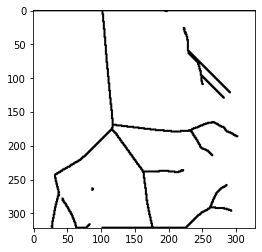

from inverse_skeletonize_from_array: eroded the negative image 1


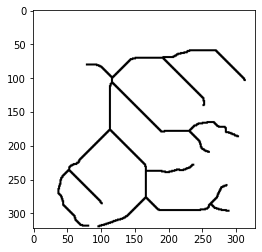

from inverse_skeletonize_from_array: eroded the negative image 1


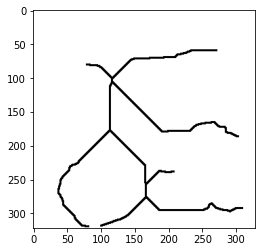

from inverse_skeletonize_from_array: eroded the negative image 1


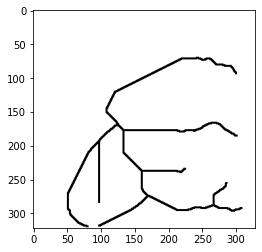

In [79]:
lotsa_inverse_skeletons = []
#inverse skeletonize trimmed graphs 
for trim_skel in trimmed_skeletons:


    med_axis , skeleton , skeleton_lee , thinned , thinned_partial = inverse_skeletonize_from_array(trim_skel)

    inverse_skeletons = [med_axis , skeleton , skeleton_lee , thinned]

    lotsa_inverse_skeletons.append(inverse_skeletons)



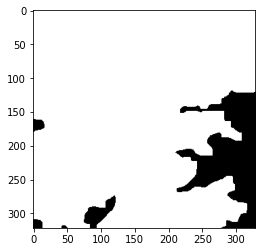

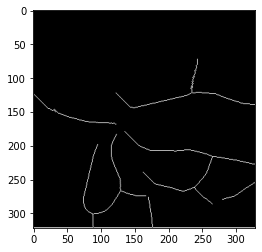

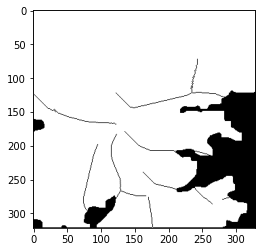

In [80]:
#overlay boundary and one inverse skeleton image

image1 = e_d_image

image2 = (lotsa_inverse_skeletons[3][0]>0)*255 # grab medial axis 
show_image(image1)

show_image(image2)
cv2.imwrite( "medial_axis_inverse_skeleton.png", new_image*255 )


make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)


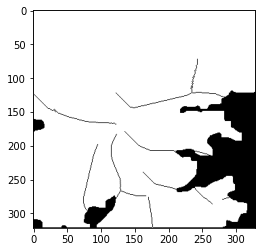

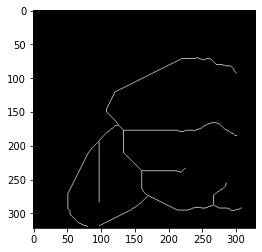

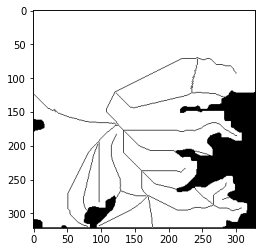

True

In [81]:
#combine boundary and skeleton images to create full boundary image 

image1 = new_image

image2 = trimmed_skeletons[3]

show_image(image1)

show_image(image2)

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)

skel_name = 'zig_zag_skeleton.png'
bound_name = 'overlay_boundary_image.png'

cv2.imwrite( skel_name, trimmed_skeletons[3] )
cv2.imwrite( bound_name, new_image*255 )


found image at :  zig_zag_skeleton.png

skeleton converted to graph

found image at :  overlay_boundary_image.png


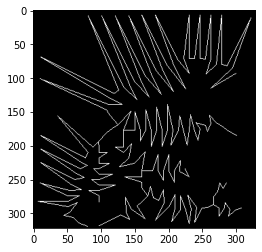

True

In [82]:
#create full zig zag, this time with modified zig zag that prevents overlapping paths

path_to_skeleton = skel_name

path_to_boundary_image = bound_name

zig_zag_width = 8

image,zig_zag_points_dict = zig_zag_full_image_3 ( path_to_skeleton, path_to_boundary_image, zig_zag_width) 

show_image(image)

zig_zag_name = 'zigzag_full.png'

cv2.imwrite(zig_zag_name, image )

In [83]:
#create csv file from zig zag full

lee_skel = trimmed_skeletons[3]
name = 'trim_skel_graph.csv'

graph = skeleton_to_graph_from_array(lee_skel)

path_to_csv = write_chinese_post_man_from_graph_csv(graph,name)
print(path_to_csv)


skeleton converted to graph

done
/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Pipeline_july27/trim_skel_graph.csv



skeleton converted to graph

resolution: -8.610942249243486e-05 7.111801242236001e-05
 LONG, LAT:  -81.2253 34.02675
 upper LONGG, LAT:  -81.25002 34.0451
launching from : (287, 258)
starting node, distance, xy:  7 3.605551275463989 [285. 255.]


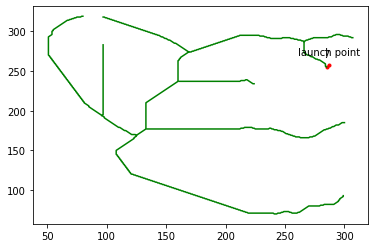

In [84]:
#use chinese post man to calculate most efficient route covering all edges 
#HEADS UP : you will need to make a custom config file for each map you apply this to , as well as pick some arbitrary launch point (jakes landing )

# PRAISE BE TO https://github.com/brooksandrew/postman_problems#python where i got the bones for this code from


#inputs
# path_to_skel = zig_zag_name
#get path_to_csv from  write_cpp_from_graph_csv2(graph,name)
lee_skel = trimmed_skeletons[3]
graph = skeleton_to_graph_from_array(lee_skel)

config_file  = r"/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/ibrahim_config.wf" #config file 
launch_point = (34.02675, -81.2253)


circuit, graph = chinese_post_man_from_graph(graph,config_file,launch_point, path_to_csv)


# # print solution route 
# for e in circuit:
#     print(e)

# # print solution summary stats
# for k, v in calculate_postman_solution_stats(circuit).items():
#     print(k, v)


In [85]:
#calulate the distance in meters of your graph 
from get_graph_distance import *

path = zig_zag_name

#take 2 arbitrary points 
waypoint1 = convert_xy_to_latlong(0, 0, config_file)
waypoint2 = convert_xy_to_latlong(0, 1, config_file)

#use those points to calculate distance ---- this could be streamlined by getting the arbitrary points inside get_graph_distance later 
total_distance, weight_sum , unit_distance = get_graph_distance(waypoint1,waypoint2,path)
print(total_distance, weight_sum , unit_distance )


from generate_waypoints: be sure that waypoint 1 and 2 are adjacent aka have either same longitude or latitude 

found image at :  zigzag_full.png

skeleton converted to graph



total distance of graph at  zigzag_full.png  

(in meters) is 6891.998172156519
6891.998172156519 5729.089029629561 1.2029832555424873


In [86]:
# print(graph.edges())
# for s,e in graph.edges():
#     ps = graph[s][e]['pts']
#     start = [ ps[0,1],ps[0,0] ]
#     end = [ ps[-1,1],ps[-1,0] ]
# print(s,e)

# print  (graph[123][122]['pts'])

for e in circuit:
    print(e)

('7', '10', 0, {'distance': 42.21320343559643, 'id': 9})
('10', '11', 0, {'distance': 46.38477631085023, 'id': 12, 'augmented': True})
('11', '10', 0, {'distance': 46.38477631085023, 'id': 12})
('10', '8', 0, {'distance': 109.84062043356596, 'id': 10})
('8', '12', 0, {'distance': 90.2253967444162, 'id': 11, 'augmented': True})
('12', '8', 0, {'distance': 90.2253967444162, 'id': 11})
('8', '6', 0, {'distance': 39.727922061357845, 'id': 8})
('6', '5', 0, {'distance': 65.89949493661166, 'id': 7, 'augmented': True})
('5', '6', 0, {'distance': 65.89949493661166, 'id': 7})
('6', '2', 0, {'distance': 70.18376618407356, 'id': 4})
('2', '3', 0, {'distance': 180.91168824543144, 'id': 3, 'augmented': True})
('3', '2', 0, {'distance': 180.91168824543144, 'id': 3})
('2', '1', 0, {'distance': 11.31370849898476, 'id': 2})
('1', '4', 0, {'distance': 39.94112549695427, 'id': 1, 'augmented': True})
('4', '9', 0, {'distance': 89.41421356237309, 'id': 6})
('9', '4', 0, {'distance': 89.41421356237309, 'id'

found image at :  e_d_image.png
found image at :  zigzag_full.png


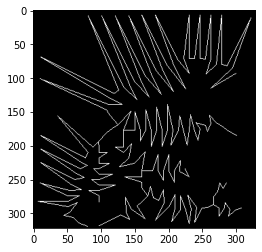

69.87131027825369 7.5632924271105475 93360 706108.9809950407


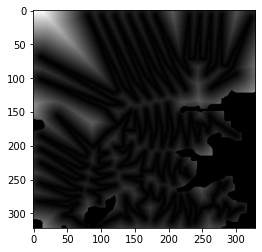

In [87]:
# Calculate MEAN DISTANCE TO SAMPLED POINT as well
from find_coverage_metrics_from_array import *

boundary_path = r'e_d_image.png' # can get these from earlier in the code instead 
zig_zag_path = r'zigzag_full.png'
boundary = open_image(boundary_path)
zig_zag = open_image(zig_zag_path) 
show_image(zig_zag)


max_distance,mean_distance,points_sum,distance_sum,distance_graph = find_coverage_metrics_from_array (boundary,zig_zag)

print(max_distance,mean_distance,points_sum,distance_sum)
show_image(distance_graph)

In [88]:
# next pipeline make the thing so it is only like 10km in length 

In [89]:
# ok buddy heres what nare suggests: whenever you do the zig zag add the edge points into an array that can be saved

# or even better do the zig zag after you do cpp and do the zig zag in the cpp order ? 

#i think just implement the first idea, pass those points to the make waypoints pipeline, but make sure they are passed in the right order (some may be in backwards order )

In [90]:
#create file of x,y coordinate points in the order of cpp 

# GET THIS STEP WORKING: right now it seems that the problem is that the graph needs to be of the zig zag, so you are taking the points from the zig zag graph and adding them to the mission file


f = open("coordinates.txt", "w")
# f.write()

edges = graph.edges()
# ps = graph[s][e]['pts']
#graph[s][e]['pts']

for e in circuit:
    node0 = int(e[0])
    node1 = int(e[1])
    
    points = zig_zag_points_dict.get( (node0,node1) )

    # if len(points) == 0: print('error at' , e)
    # else: print(points)
    
    for pt in range(0,len(points)):
        f.write(str(points[pt][0]) + ',' + str(points[pt][1]) + '\n')

    points = []

f.close()

In [92]:
#convert coordinates to waypoints 
from generate_waypoints import *

# input_dir = "/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Pipeline_july27/" #path to line_pttrn, config_file_line, out_file_type
input_dir = ""
line_pttrn = "coordinates.txt" # coordinate file 
config_file_line = config_file #config file 

out_file_type = "c" #option = m (stands for mission palnner) or c (csv file)

generate_waypoints(input_dir + line_pttrn, input_dir + config_file_line, out_file_type)



coordinates_waypoints.csv
34.02618260869565 -81.22530659574468
34.02618260869565 -81.22539270516717
34.02618260869565 -81.22547881458966
34.02618260869565 -81.22556492401216
34.02618260869565 -81.22565103343464
34.02618260869565 -81.22573714285714
34.02618260869565 -81.22582325227964
34.02618260869565 -81.22590936170212
34.02618260869565 -81.22599547112462
34.02618260869565 -81.2260815805471
34.02618260869565 -81.2261676899696
34.02618260869565 -81.2262537993921
34.02618260869565 -81.22633990881458
34.02618260869565 -81.22633990881458
34.02611149068323 -81.22642601823708
34.026040372670806 -81.22651212765957
34.025969254658385 -81.22659823708206
34.025969254658385 -81.22668434650456
34.025898136645964 -81.22677045592705
34.025827018633535 -81.22685656534954
34.025755900621114 -81.22694267477203
34.025755900621114 -81.22694267477203
34.025755900621114 -81.22702878419453
34.025755900621114 -81.22711489361701
34.02568478260869 -81.22720100303951
34.02568478260869 -81.22728711246201
34.025

In [ ]:
#try and implement rural post man 